In [1]:
!pip install benchmarx --quiet

In [2]:
# Imports
from benchmarx import Benchmark, QuadraticProblem
import jax.numpy as jnp
from jax import random

/Users/aleksandrtrisin/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Create Quadratic Problem
n = 3       # dimension
qp = QuadraticProblem(n=n)

# initial point
RNG = random.PRNGKey(1230)
RNG, _ = random.split(RNG)
x_init = random.normal(RNG, (n,))

In [4]:
# Benchmark object to create an experiment
benchmark = Benchmark(
    problem=qp,
    runs=2,      # each method will be executed <runs> times
    methods = [
        {
            'GRADIENT_DESCENT_const_step': {
                'x_init' : x_init,
                'tol': 1e-9,
                'maxiter': 300,
                'stepsize' : 2*1e-1,
                'acceleration': False,
                'label': 'GD_2e-1'
            },
            'GRADIENT_DESCENT_const_step2': {
                'x_init' : x_init,
                'tol': 1e-9,
                'maxiter': 300,
                'stepsize' : 1e-2,
                'acceleration': False,
                'label': 'GD_1e-2'
            },
            'GRADIENT_DESCENT_adaptive_step': {
                'x_init' : x_init,
                'tol': 1e-9,
                'maxiter': 300,
                'stepsize' : lambda iter_num:  1 / (iter_num + 9),
                'acceleration': False,
                'label': 'GD_1/(k+9)'
            }
        }
    ],
    metrics=[           # these data will be tracked as the experiment progresses
        "nit",
        "history_x",
        "history_f",
        "history_df"
    ]
)

In [5]:
# Run the experiment
res = benchmark.run()

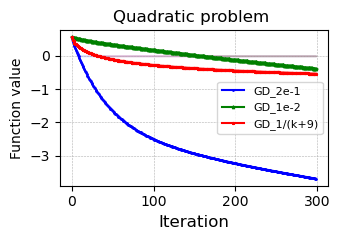

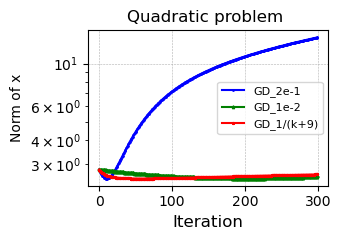

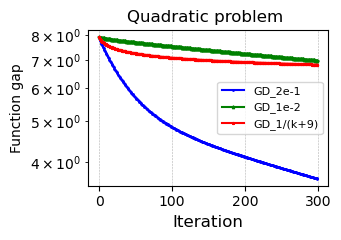

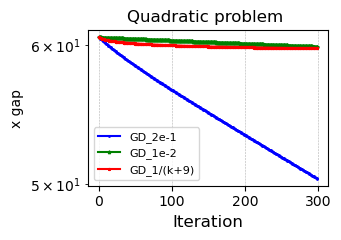

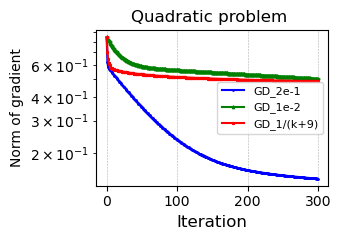

In [6]:
# Let's plot our results
res.plot(
        metrics_to_plot= ['fs', 'xs_norm', 'f_gap', 'x_gap', 'grads_norm'],
        dir_path='plots',     # directory to save plots
        fname_append='test1',
        show=True,
        log=True              # log scale above the y-axis. 
                              # Will be ignored if the data have non-positive values.
    )